Mounted at /content/drive


<ipython-input-1-5ad8ca5d3dd2>:21: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, res_type='kaiser_fast', duration=duration)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error encountered while parsing file:  /content/drive/My Drive/genres/jazz/jazz.00054.wav
Shape of X: (999, 128, 1291)
Shape of y: (999,)
Shape of X_train: (799, 128, 1291)
Shape of y_train: (799,)
Shape of X_test: (200, 128, 1291)
Shape of y_test: (200,)
Number of files in train set: 799
Number of files in test set: 200

Number of files from each genre in train set:
Genre: blues - Count: 80
Genre: classical - Count: 80
Genre: country - Count: 80
Genre: disco - Count: 80
Genre: hiphop - Count: 80
Genre: jazz - Count: 79
Genre: metal - Count: 80
Genre: pop - Count: 80
Genre: reggae - Count: 80
Genre: rock - Count: 80

Number of files from each genre in test set:
Genre: blues - Count: 20
Genre: classical - Count: 20
Genre: country - Count: 20
Genre: disco - Count: 20
Genre: hiphop - Count: 20
Genre: jazz - Count: 20
Genre: metal - Count: 20
Genre: pop - Count: 20
Genre: reggae - Count: 20
Genre: rock - Count: 20

Example spectrograms from train set:


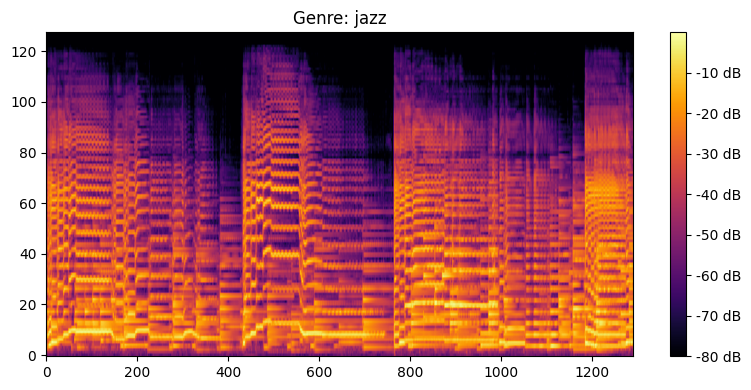

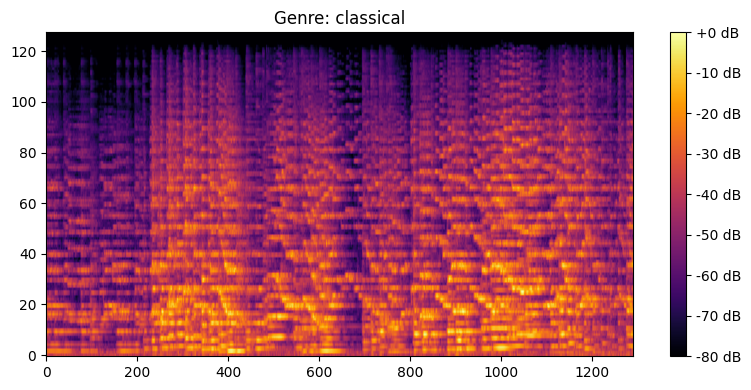

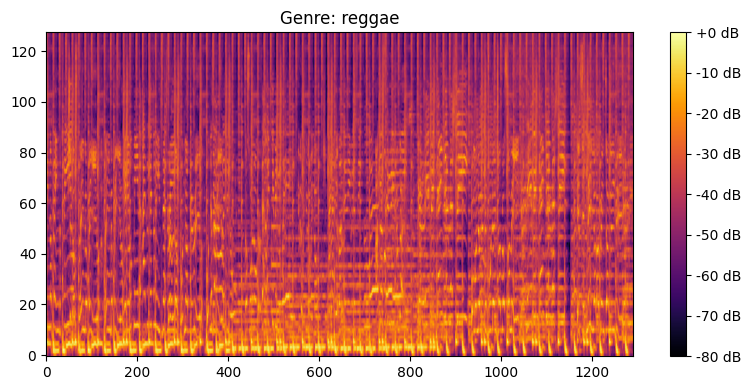

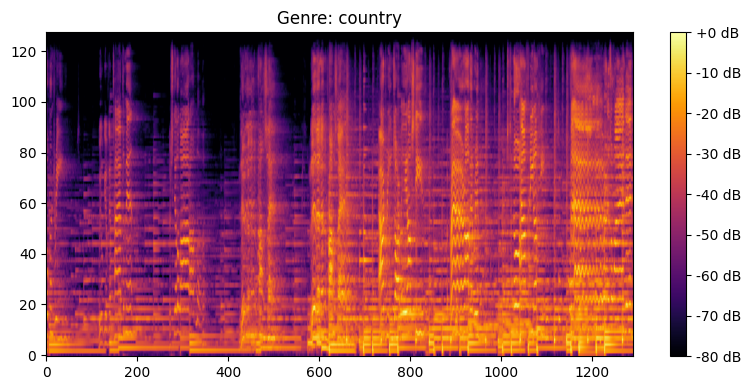

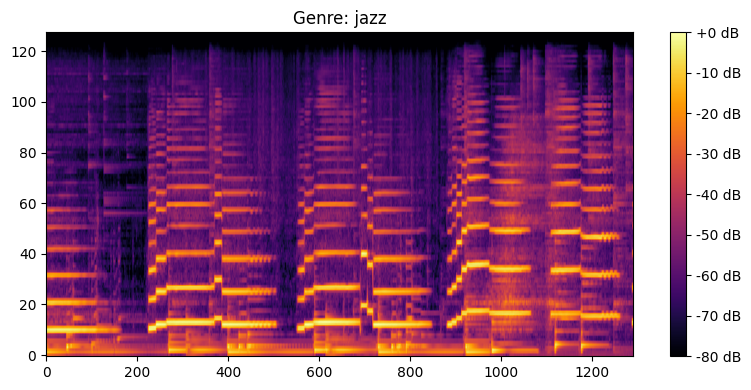


Example spectrograms from test set:


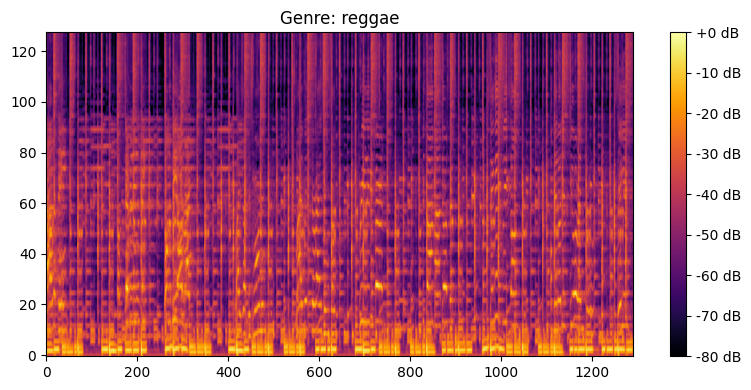

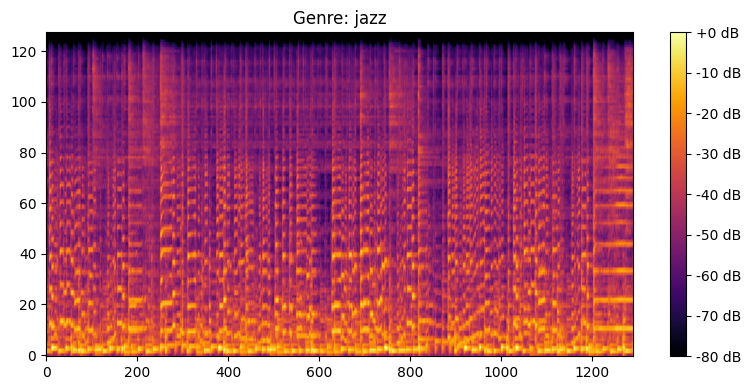

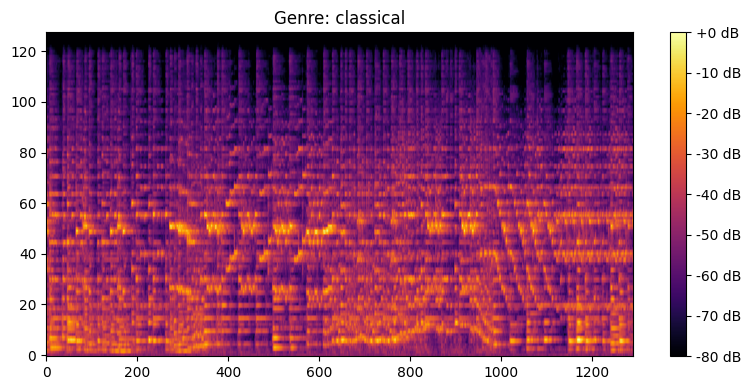

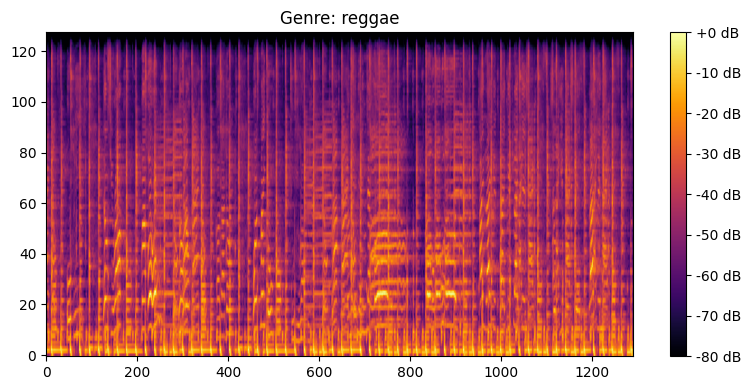

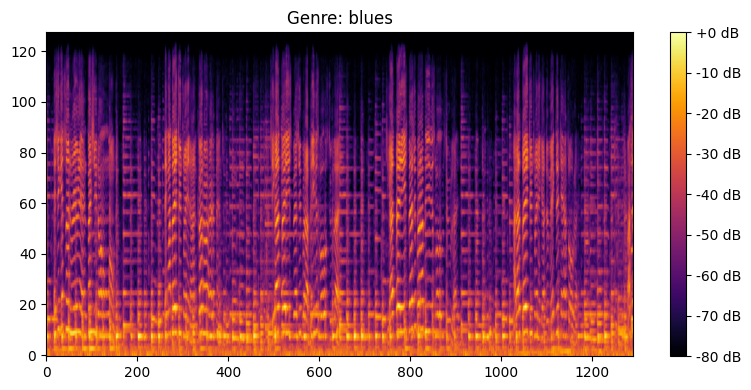

In [ ]:
import os
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import svm
from sklearn.metrics import accuracy_score
import tarfile
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')


# extract spectrograms from audio files with fixed shape
def extract_spectrograms(file_path, n_fft=2048, hop_length=512, n_mels=128, duration=30):
    try:
        audio, sr = librosa.load(file_path, res_type='kaiser_fast', duration=duration)
        spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
        spectrogram = librosa.power_to_db(spectrogram, ref=np.max)  # Convert to dB scale
        # Pad or truncate spectrogram to have a fixed shape
        target_shape = (n_mels, duration * sr // hop_length)
        if spectrogram.shape[1] < target_shape[1]:  # If shorter pad
            padding = np.zeros((n_mels, target_shape[1] - spectrogram.shape[1]))
            spectrogram = np.hstack((spectrogram, padding))
        elif spectrogram.shape[1] > target_shape[1]:  # If longer truncate
            spectrogram = spectrogram[:, :target_shape[1]]
    except Exception as e:
        print("Error encountered while parsing file: ", file_path)
        return None
    return spectrogram

# Load dataset

data_path = "/content/drive/My Drive/genres"
genres = os.listdir(data_path)
X, y = [], []

for genre in genres:
    genre_path = os.path.join(data_path, genre)
    if not os.path.isdir(genre_path):
        continue  # Skip non-directory files

    for file in os.listdir(genre_path):
        file_path = os.path.join(genre_path, file)
        if file_path.endswith('.wav'):
            spectrogram = extract_spectrograms(file_path)
            if spectrogram is not None:
                X.append(spectrogram)
                y.append(genre)  #  genre name as label

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Train-test split with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=24)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

print("Number of files in train set:", len(X_train))
print("Number of files in test set:", len(X_test))

# Print number of files from each genre in train set
print("\nNumber of files from each genre in train set:")
unique_train_genres, train_counts = np.unique(y_train, return_counts=True)
for genre, count in zip(unique_train_genres, train_counts):
    print("Genre:", genre, "- Count:", count)

# Print number of files from each genre in test set
print("\nNumber of files from each genre in test set:")
unique_test_genres, test_counts = np.unique(y_test, return_counts=True)
for genre, count in zip(unique_test_genres, test_counts):
    print("Genre:", genre, "- Count:", count)

# Print example spectrograms from train set
print("\nExample spectrograms from train set:")
for i in range(min(5, len(X_train))):
    plt.figure(figsize=(8, 4))
    plt.title("Genre: " + y_train[i])
    plt.imshow(X_train[i], aspect='auto', origin='lower', cmap='inferno')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.show()

# Print example spectrograms from test set
print("\nExample spectrograms from test set:")
for i in range(min(5, len(X_test))):
    plt.figure(figsize=(8, 4))
    plt.title("Genre: " + y_test[i])
    plt.imshow(X_test[i], aspect='auto', origin='lower', cmap='inferno')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.show()

Length of Train Loader 7
Length of Test Loader 4
input size 6400
Number of trainable parameters: 64010
Layer: fc1.weight, Number of parameters: 64000
Layer: fc1.bias, Number of parameters: 10
Epoch [1/150]
Epoch [1/150], Train Loss: 2.1210, Train Accuracy: 17.15%
Processing Testing Batch 1/4...
Processing Testing Batch 2/4...
Processing Testing Batch 3/4...
Processing Testing Batch 4/4...
Test Loss: 2.0133, Test Accuracy: 25.50%
Epoch [2/150]
Epoch [2/150], Train Loss: 1.9064, Train Accuracy: 29.79%
Processing Testing Batch 1/4...
Processing Testing Batch 2/4...
Processing Testing Batch 3/4...
Processing Testing Batch 4/4...
Test Loss: 1.9425, Test Accuracy: 38.00%
Epoch [3/150]
Epoch [3/150], Train Loss: 1.7790, Train Accuracy: 37.55%
Processing Testing Batch 1/4...
Processing Testing Batch 2/4...
Processing Testing Batch 3/4...
Processing Testing Batch 4/4...
Test Loss: 1.8761, Test Accuracy: 35.00%
Epoch [4/150]
Epoch [4/150], Train Loss: 1.6835, Train Accuracy: 42.05%
Processing Te

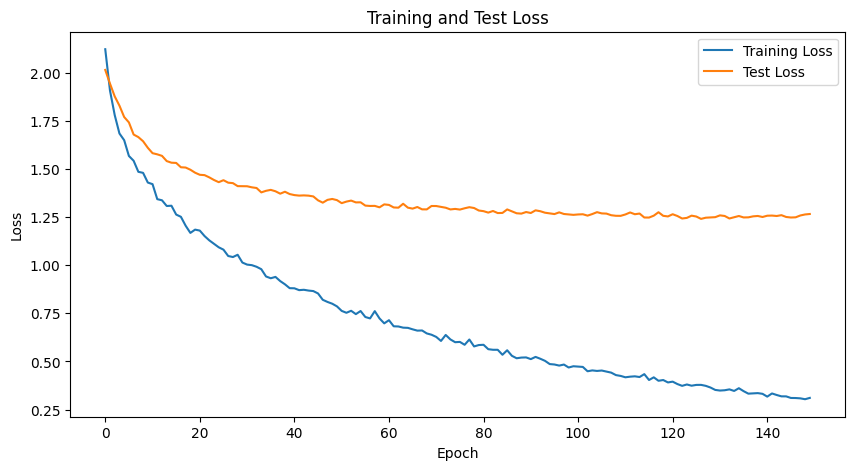

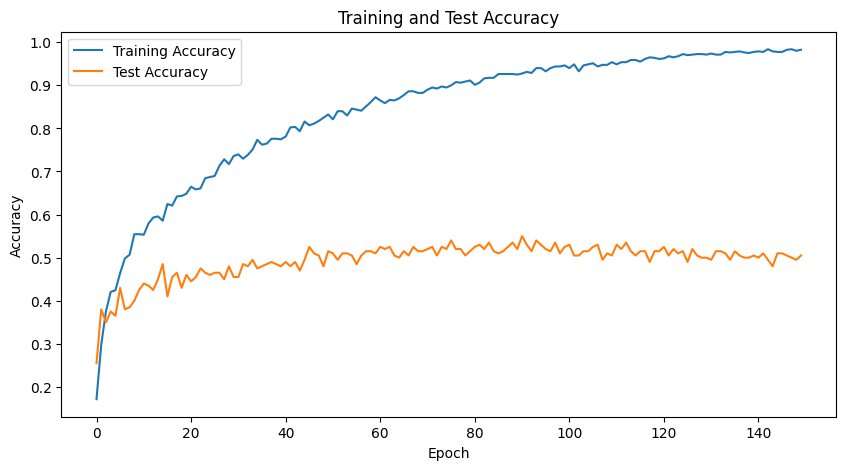

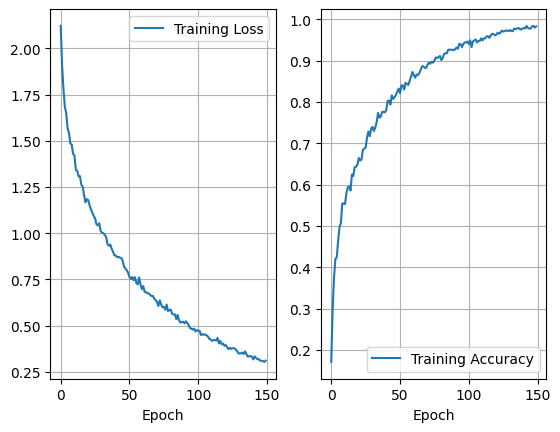

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from torchvision import transforms


# Define Linear Model
class LinearModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LinearModel, self).__init__()
        self.fc1 = nn.Linear(input_size, num_classes)
        #nn.init.xavier_uniform_(self.fc1.weight)
        print("input size", input_size)

    def forward(self, x):
        s = self.fc1( x.view(x.size(0), -1) )
        return s


#train_losses, train_accuracies, test_losses, test_accuracies = train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=100)

# Function to train the model
def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=150):
    train_losses = []
    train_accuracies = []
    test_losses = []
    test_accuracies = []

    for epoch in range(num_epochs):
        # initialize
        print(f"Epoch [{epoch + 1}/{num_epochs}]")
        model.train()
        correct_train = 0
        total_train = 0
        running_loss = 0.0
        total_batches = len(train_loader)
        # Gradient descent per batch
        #for batch_idx, (inputs, labels) in enumerate(train_loader):
        for inputs, labels in train_loader:
            #print(f'Processing Training Batch {batch_idx + 1}/{total_batches}...')
            optimizer.zero_grad()
            #print("shape of input", inputs.shape)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            # accuracy
            _, predicted = torch.max(outputs, 1)
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)
            running_loss += loss.item()
        # summary gradient descent
        train_loss = running_loss / len(train_loader)
        train_accuracy = correct_train / total_train
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        # Print training and testing loss and accuracy
        print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {100 * train_accuracy:.2f}%')

        # Evaluate model on test set after completing training
        test_loss, test_accuracy = evaluate_model(model, test_loader, criterion)
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)
        print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {100 * test_accuracy:.2f}%')

    return train_losses, train_accuracies, test_losses, test_accuracies


# Evaluation function
def evaluate_model(model, test_loader, criterion):
    model.eval()
    correct = 0
    total = 0
    test_loss = 0
    total_batches = len(test_loader)

    with torch.no_grad():
      for batch_idx, (inputs, labels) in enumerate(test_loader):
        print(f'Processing Testing Batch {batch_idx + 1}/{total_batches}...')
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    test_loss /= len(test_loader)
    test_accuracy = correct / total

    return test_loss, test_accuracy


# Load and preprocess data
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
# label_encoder.inverse_transform([k for k in range(10)])
#--------------------------------------------------------
# 0: 'blues'
# 1: 'classical'
# 2: 'country'
# 3: 'disco'
# 4: 'hiphop',
# 5:'jazz',
# 6: 'metal',
# 7: 'pop',
# 8: 'reggae',
# 9: 'rock'



###train_data_bad = TensorDataset(torch.tensor(X_train, dtype=torch.float32).unsqueeze(1), torch.tensor(y_train_encoded))
###test_data_bad = TensorDataset(torch.tensor(X_test, dtype=torch.float32).unsqueeze(1), torch.tensor(y_test_encoded))

# # Data Augmentation
myTransform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((64,100),antialias=True),
    transforms.Normalize(-42.88,15.50),
])

class MyDataset():
    def __init__(self, X, y, transform=None):
        self.X = X
        self.y = y
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        x = self.X[index]
        if self.transform:
            x = self.transform(x).float()

        y = torch.tensor(self.y[index])

        return x, y


# transform float instead of double...
#train_data = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train_encoded))
#test_data = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test_encoded))
train_data = MyDataset(X_train,y_train_encoded,myTransform)
test_data = MyDataset(X_test,y_test_encoded,myTransform)
x_tp,y_tp = train_data.__getitem__(12)


train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
test_loader = DataLoader(test_data, batch_size=128)
x_batch,y_batch = next(iter(train_loader))
print("Length of Train Loader", len(train_loader))
test_loader = DataLoader(test_data, batch_size=64)
print("Length of Test Loader", len(test_loader))

# Initialize the Linear Model
input_size = x_tp.shape[1] * x_tp.shape[2]
model = LinearModel(input_size=input_size, num_classes=10)
# Count the number of trainable parameters in the model
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Number of trainable parameters: {total_params}")
for name, param in model.named_parameters():
    print(f"Layer: {name}, Number of parameters: {param.numel()}")


# Define loss function, optimizer, and learning rate scheduler
criterion = nn.CrossEntropyLoss()
#optimizer = optim.Adam(model.parameters(), lr=0.00001, betas=(0.9, 0.999), eps=1e-08)
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Train the model
train_losses, train_accuracies, test_losses, test_accuracies = train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=150)
# Evaluate model on test set after completing all epochs
final_test_loss, final_test_accuracy = evaluate_model(model, test_loader, criterion)

# Print final test loss and accuracy
print(f'Final Test Loss: {final_test_loss:.4f}, Final Test Accuracy: {100 * final_test_accuracy:.2f}%')

# Plotting the training and test loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

# Plotting the training and test accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()



# plot
plt.figure(11);plt.clf()
plt.subplot(121)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch');plt.legend();plt.grid()
plt.subplot(122)
plt.plot(train_accuracies, label='Training Accuracy')
plt.xlabel('Epoch');plt.legend();plt.grid()
plt.show()

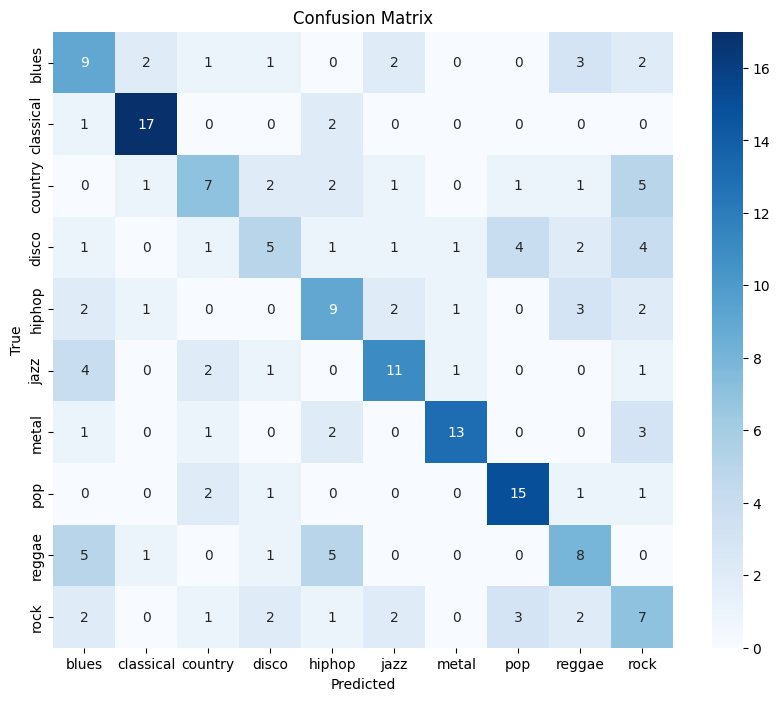

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(model, test_loader, label_encoder):
    model.eval()
    predictions = []
    true_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            predictions.extend(predicted.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    confusion = confusion_matrix(true_labels, predictions)
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(model, test_loader, label_encoder)

Streaming output truncated to the last 5000 lines.
Size after second convolution: torch.Size([128, 16, 6, 10])
Size after third convolution: torch.Size([128, 32, 1, 2])
Size after first convolution: torch.Size([31, 8, 20, 32])
Size after second convolution: torch.Size([31, 16, 6, 10])
Size after third convolution: torch.Size([31, 32, 1, 2])
Epoch [26/150], Train Loss: 1.9723, Train Accuracy: 29.54%
Processing Testing Batch 1/4...
Size after first convolution: torch.Size([64, 8, 20, 32])
Size after second convolution: torch.Size([64, 16, 6, 10])
Size after third convolution: torch.Size([64, 32, 1, 2])
Processing Testing Batch 2/4...
Size after first convolution: torch.Size([64, 8, 20, 32])
Size after second convolution: torch.Size([64, 16, 6, 10])
Size after third convolution: torch.Size([64, 32, 1, 2])
Processing Testing Batch 3/4...
Size after first convolution: torch.Size([64, 8, 20, 32])
Size after second convolution: torch.Size([64, 16, 6, 10])
Size after third convolution: torch.S

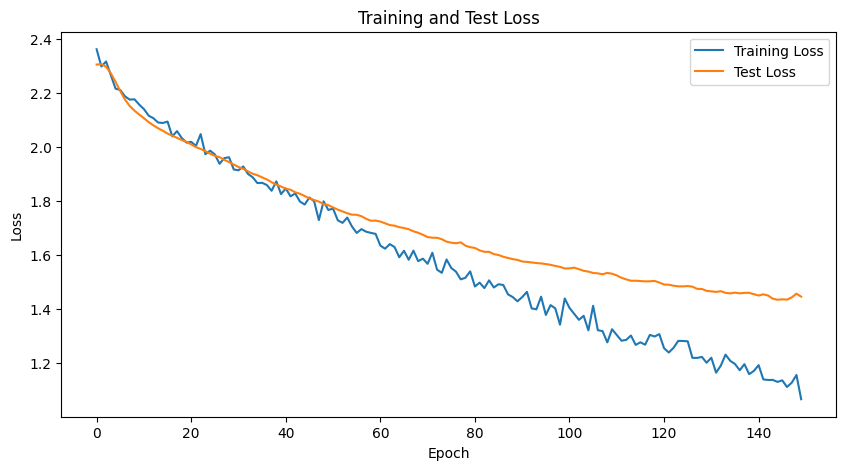

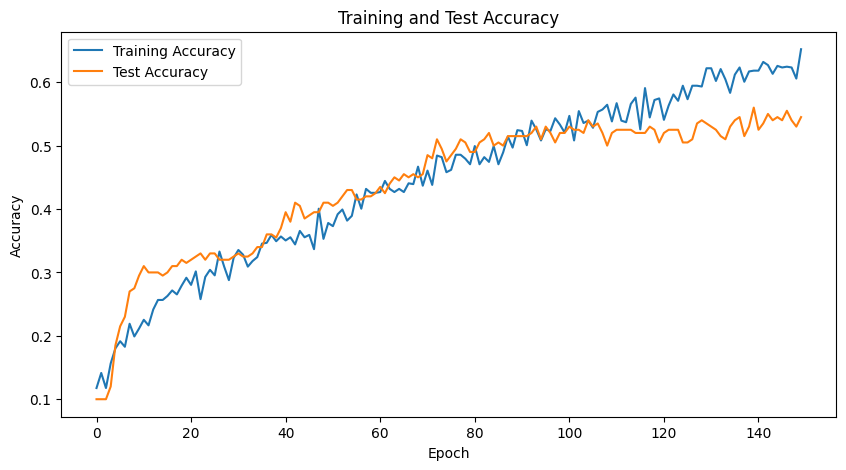

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from torchvision import transforms


class SimpleCNN(nn.Module):
    def __init__(self, num_classes, dropout_prob=0.5):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3)
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3)
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3)
        self.pool = nn.MaxPool2d(kernel_size=3, stride=3)
        self.dropout = nn.Dropout(dropout_prob)
        self.bn1 = nn.BatchNorm2d(8)
        self.bn2 = nn.BatchNorm2d(16)
        self.bn3 = nn.BatchNorm2d(32)
        self.fc_input_size = self.calculate_fc_input_size()
        print("Size of input to fc1:", self.fc_input_size)
        self.fc1 = nn.Linear(self.fc_input_size, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def calculate_fc_input_size(self):
        x = torch.randn(128, 1, 64, 100)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        return x.view(x.size(0), -1).shape[1]

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        print("Size after first convolution:", x.size())
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        print("Size after second convolution:", x.size())
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        print("Size after third convolution:", x.size())
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

#train_losses, train_accuracies, test_losses, test_accuracies = train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=100)

# Function to train the model
def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=150):
    simple_cnn_train_losses = []
    simple_cnn_train_accuracies = []
    simple_cnn_test_losses = []
    simple_cnn_test_accuracies = []

    for epoch in range(num_epochs):
        # initialize
        print(f"Epoch [{epoch + 1}/{num_epochs}]")
        model.train()
        correct_train = 0
        total_train = 0
        running_loss = 0.0
        total_batches = len(train_loader)
        # Gradient descent per batch
        #for batch_idx, (inputs, labels) in enumerate(train_loader):
        for inputs, labels in train_loader:
            #print(f'Processing Training Batch {batch_idx + 1}/{total_batches}...')
            optimizer.zero_grad()
            #print("shape of input", inputs.shape)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            # accuracy
            _, predicted = torch.max(outputs, 1)
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)
            running_loss += loss.item()
        # summary gradient descent
        train_loss = running_loss / len(train_loader)
        train_accuracy = correct_train / total_train
        simple_cnn_train_losses.append(train_loss)
        simple_cnn_train_accuracies.append(train_accuracy)

        # Print training and testing loss and accuracy
        print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {100 * train_accuracy:.2f}%')

        # Evaluate model on test set after completing training
        test_loss, test_accuracy = evaluate_model(model, test_loader, criterion)
        simple_cnn_test_losses.append(test_loss)
        simple_cnn_test_accuracies.append(test_accuracy)
        print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {100 * test_accuracy:.2f}%')

    return simple_cnn_train_losses, simple_cnn_train_accuracies, simple_cnn_test_losses, simple_cnn_test_accuracies


# Evaluation function
def evaluate_model(model, test_loader, criterion):
    model.eval()
    correct = 0
    total = 0
    test_loss = 0
    total_batches = len(test_loader)

    with torch.no_grad():
      for batch_idx, (inputs, labels) in enumerate(test_loader):
        print(f'Processing Testing Batch {batch_idx + 1}/{total_batches}...')
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    test_loss /= len(test_loader)
    test_accuracy = correct / total

    return test_loss, test_accuracy


# Load and preprocess data
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
# label_encoder.inverse_transform([k for k in range(10)])
#--------------------------------------------------------
# 0: 'blues'
# 1: 'classical'
# 2: 'country'
# 3: 'disco'
# 4: 'hiphop',
# 5:'jazz',
# 6: 'metal',
# 7: 'pop',
# 8: 'reggae',
# 9: 'rock'



###train_data_bad = TensorDataset(torch.tensor(X_train, dtype=torch.float32).unsqueeze(1), torch.tensor(y_train_encoded))
###test_data_bad = TensorDataset(torch.tensor(X_test, dtype=torch.float32).unsqueeze(1), torch.tensor(y_test_encoded))

# # Data Augmentation
myTransform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((64,100),antialias=True),
    transforms.Normalize(-42.88,15.50),
])

class MyDataset():
    def __init__(self, X, y, transform=None):
        self.X = X
        self.y = y
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        x = self.X[index]
        if self.transform:
            x = self.transform(x).float()

        y = torch.tensor(self.y[index])

        return x, y


# transform float instead of double...
#train_data = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train_encoded))
#test_data = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test_encoded))
train_data = MyDataset(X_train,y_train_encoded,myTransform)
test_data = MyDataset(X_test,y_test_encoded,myTransform)
x_tp,y_tp = train_data.__getitem__(12)


train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
test_loader = DataLoader(test_data, batch_size=128)
x_batch,y_batch = next(iter(train_loader))
print("Length of Train Loader", len(train_loader))
test_loader = DataLoader(test_data, batch_size=64)
print("Length of Test Loader", len(test_loader))

# Initialize the CNN Model
model = SimpleCNN(num_classes=len(label_encoder.classes_))
# Count the number of trainable parameters in the model
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Number of trainable parameters: {total_params}")
for name, param in model.named_parameters():
    print(f"Layer: {name}, Number of parameters: {param.numel()}")


# Define loss function, optimizer, and learning rate scheduler
criterion = nn.CrossEntropyLoss()
#optimizer = optim.Adam(model.parameters(), lr=0.00001, betas=(0.9, 0.999), eps=1e-08)
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Train the model
simple_cnn_train_losses, simple_cnn_train_accuracies, simple_cnn_test_losses, simple_cnn_test_accuracies = train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=150)
# Evaluate model on test set after completing all epochs
final_test_loss, final_test_accuracy = evaluate_model(model, test_loader, criterion)

# Print final test loss and accuracy
print(f'Final Test Loss: {final_test_loss:.4f}, Final Test Accuracy: {100 * final_test_accuracy:.2f}%')

# Plotting the training and test loss
plt.figure(figsize=(10, 5))
plt.plot(simple_cnn_train_losses, label='Training Loss')
plt.plot(simple_cnn_test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

# Plotting the training and test accuracy
plt.figure(figsize=(10, 5))
plt.plot(simple_cnn_train_accuracies, label='Training Accuracy')
plt.plot(simple_cnn_test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()


Size after first convolution: torch.Size([64, 8, 20, 32])
Size after second convolution: torch.Size([64, 16, 6, 10])
Size after third convolution: torch.Size([64, 32, 1, 2])
Size after first convolution: torch.Size([64, 8, 20, 32])
Size after second convolution: torch.Size([64, 16, 6, 10])
Size after third convolution: torch.Size([64, 32, 1, 2])
Size after first convolution: torch.Size([64, 8, 20, 32])
Size after second convolution: torch.Size([64, 16, 6, 10])
Size after third convolution: torch.Size([64, 32, 1, 2])
Size after first convolution: torch.Size([8, 8, 20, 32])
Size after second convolution: torch.Size([8, 16, 6, 10])
Size after third convolution: torch.Size([8, 32, 1, 2])


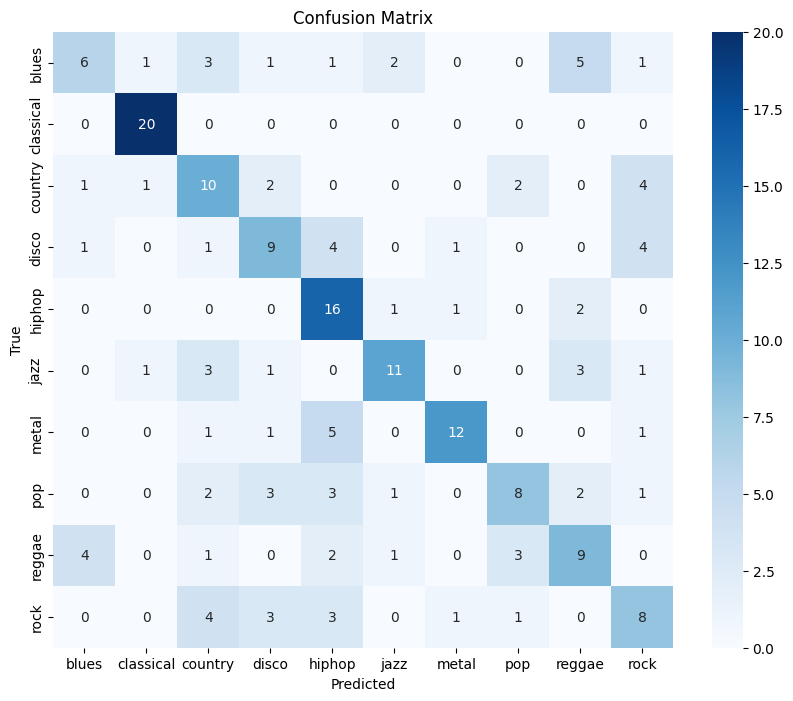

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(model, test_loader, label_encoder):
    model.eval()
    predictions = []
    true_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            predictions.extend(predicted.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    confusion = confusion_matrix(true_labels, predictions)
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(model, test_loader, label_encoder)

Streaming output truncated to the last 5000 lines.
Size after second convolution: torch.Size([128, 32, 6, 10])
Size after third convolution: torch.Size([128, 64, 1, 2])
Size after first convolution: torch.Size([31, 16, 20, 32])
Size after second convolution: torch.Size([31, 32, 6, 10])
Size after third convolution: torch.Size([31, 64, 1, 2])
Epoch [26/150], Train Loss: 1.6516, Train Accuracy: 45.81%
Processing Testing Batch 1/4...
Size after first convolution: torch.Size([64, 16, 20, 32])
Size after second convolution: torch.Size([64, 32, 6, 10])
Size after third convolution: torch.Size([64, 64, 1, 2])
Processing Testing Batch 2/4...
Size after first convolution: torch.Size([64, 16, 20, 32])
Size after second convolution: torch.Size([64, 32, 6, 10])
Size after third convolution: torch.Size([64, 64, 1, 2])
Processing Testing Batch 3/4...
Size after first convolution: torch.Size([64, 16, 20, 32])
Size after second convolution: torch.Size([64, 32, 6, 10])
Size after third convolution: tor

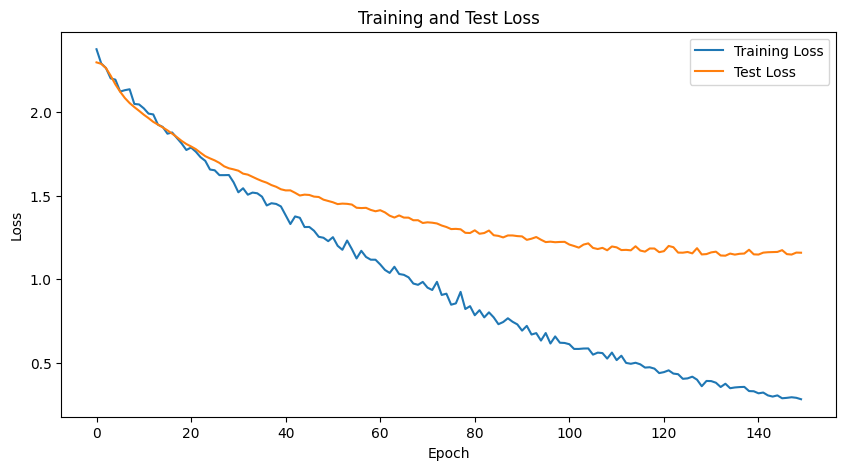

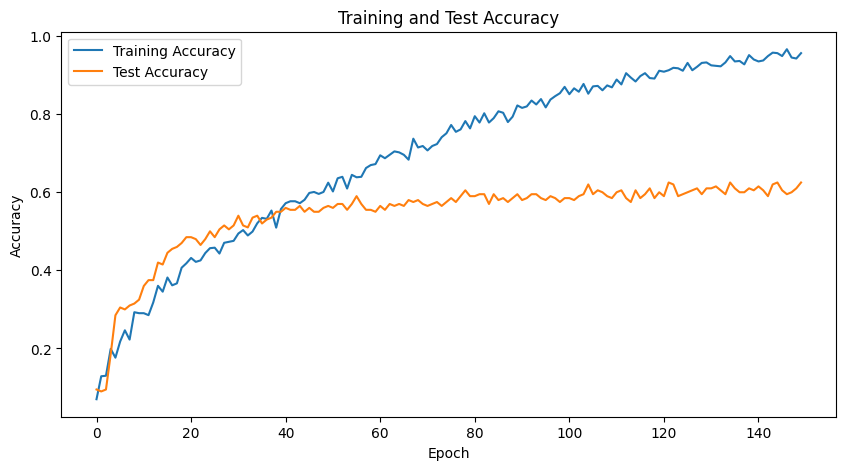

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from torchvision import transforms


class ComplexCNN(nn.Module):
    def __init__(self, num_classes, dropout_prob=0.5):
        super(ComplexCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.pool = nn.MaxPool2d(kernel_size=3, stride=3)
        self.dropout = nn.Dropout(dropout_prob)
        self.bn1 = nn.BatchNorm2d(16)
        self.bn2 = nn.BatchNorm2d(32)
        self.bn3 = nn.BatchNorm2d(64)
        self.fc_input_size = self.calculate_fc_input_size()
        print("Size of input to fc1:", self.fc_input_size)
        self.fc1 = nn.Linear(self.fc_input_size, 256)
        self.fc2 = nn.Linear(256, num_classes)

    def calculate_fc_input_size(self):
        x = torch.randn(128, 1, 64, 100)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        return x.view(x.size(0), -1).shape[1]

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        print("Size after first convolution:", x.size())
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        print("Size after second convolution:", x.size())
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        print("Size after third convolution:", x.size())
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

#train_losses, train_accuracies, test_losses, test_accuracies = train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=100)

# Function to train the model
def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=150):
    cnn_train_losses = []
    cnn_train_accuracies = []
    cnn_test_losses = []
    cnn_test_accuracies = []

    for epoch in range(num_epochs):
        # initialize
        print(f"Epoch [{epoch + 1}/{num_epochs}]")
        model.train()
        correct_train = 0
        total_train = 0
        running_loss = 0.0
        total_batches = len(train_loader)
        # Gradient descent per batch
        #for batch_idx, (inputs, labels) in enumerate(train_loader):
        for inputs, labels in train_loader:
            #print(f'Processing Training Batch {batch_idx + 1}/{total_batches}...')
            optimizer.zero_grad()
            #print("shape of input", inputs.shape)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            # accuracy
            _, predicted = torch.max(outputs, 1)
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)
            running_loss += loss.item()
        # summary gradient descent
        train_loss = running_loss / len(train_loader)
        train_accuracy = correct_train / total_train
        cnn_train_losses.append(train_loss)
        cnn_train_accuracies.append(train_accuracy)

        # Print training and testing loss and accuracy
        print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {100 * train_accuracy:.2f}%')

        # Evaluate model on test set after completing training
        test_loss, test_accuracy = evaluate_model(model, test_loader, criterion)
        cnn_test_losses.append(test_loss)
        cnn_test_accuracies.append(test_accuracy)
        print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {100 * test_accuracy:.2f}%')

    return cnn_train_losses, cnn_train_accuracies, cnn_test_losses, cnn_test_accuracies


# Evaluation function
def evaluate_model(model, test_loader, criterion):
    model.eval()
    correct = 0
    total = 0
    test_loss = 0
    total_batches = len(test_loader)

    with torch.no_grad():
      for batch_idx, (inputs, labels) in enumerate(test_loader):
        print(f'Processing Testing Batch {batch_idx + 1}/{total_batches}...')
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    test_loss /= len(test_loader)
    test_accuracy = correct / total

    return test_loss, test_accuracy


# Load and preprocess data
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
# label_encoder.inverse_transform([k for k in range(10)])
#--------------------------------------------------------
# 0: 'blues'
# 1: 'classical'
# 2: 'country'
# 3: 'disco'
# 4: 'hiphop',
# 5:'jazz',
# 6: 'metal',
# 7: 'pop',
# 8: 'reggae',
# 9: 'rock'



###train_data_bad = TensorDataset(torch.tensor(X_train, dtype=torch.float32).unsqueeze(1), torch.tensor(y_train_encoded))
###test_data_bad = TensorDataset(torch.tensor(X_test, dtype=torch.float32).unsqueeze(1), torch.tensor(y_test_encoded))

# # Data Augmentation
myTransform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((64,100),antialias=True),
    transforms.Normalize(-42.88,15.50),
])

class MyDataset():
    def __init__(self, X, y, transform=None):
        self.X = X
        self.y = y
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        x = self.X[index]
        if self.transform:
            x = self.transform(x).float()

        y = torch.tensor(self.y[index])

        return x, y


# transform float instead of double...
#train_data = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train_encoded))
#test_data = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test_encoded))
train_data = MyDataset(X_train,y_train_encoded,myTransform)
test_data = MyDataset(X_test,y_test_encoded,myTransform)
x_tp,y_tp = train_data.__getitem__(12)


train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
test_loader = DataLoader(test_data, batch_size=128)
x_batch,y_batch = next(iter(train_loader))
print("Length of Train Loader", len(train_loader))
test_loader = DataLoader(test_data, batch_size=64)
print("Length of Test Loader", len(test_loader))

# Initialize the CNN Model
model = ComplexCNN(num_classes=len(label_encoder.classes_))
# Count the number of trainable parameters in the model
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Number of trainable parameters: {total_params}")
for name, param in model.named_parameters():
    print(f"Layer: {name}, Number of parameters: {param.numel()}")


# Define loss function, optimizer, and learning rate scheduler
criterion = nn.CrossEntropyLoss()
#optimizer = optim.Adam(model.parameters(), lr=0.00001, betas=(0.9, 0.999), eps=1e-08)
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Train the model
cnn_train_losses, cnn_train_accuracies, cnn_test_losses, cnn_test_accuracies = train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=150)
# Evaluate model on test set after completing all epochs
final_test_loss, final_test_accuracy = evaluate_model(model, test_loader, criterion)

# Print final test loss and accuracy
print(f'Final Test Loss: {final_test_loss:.4f}, Final Test Accuracy: {100 * final_test_accuracy:.2f}%')

# Plotting the training and test loss
plt.figure(figsize=(10, 5))
plt.plot(cnn_train_losses, label='Training Loss')
plt.plot(cnn_test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

# Plotting the training and test accuracy
plt.figure(figsize=(10, 5))
plt.plot(cnn_train_accuracies, label='Training Accuracy')
plt.plot(cnn_test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()


Size after first convolution: torch.Size([64, 16, 20, 32])
Size after second convolution: torch.Size([64, 32, 6, 10])
Size after third convolution: torch.Size([64, 64, 1, 2])
Size after first convolution: torch.Size([64, 16, 20, 32])
Size after second convolution: torch.Size([64, 32, 6, 10])
Size after third convolution: torch.Size([64, 64, 1, 2])
Size after first convolution: torch.Size([64, 16, 20, 32])
Size after second convolution: torch.Size([64, 32, 6, 10])
Size after third convolution: torch.Size([64, 64, 1, 2])
Size after first convolution: torch.Size([8, 16, 20, 32])
Size after second convolution: torch.Size([8, 32, 6, 10])
Size after third convolution: torch.Size([8, 64, 1, 2])


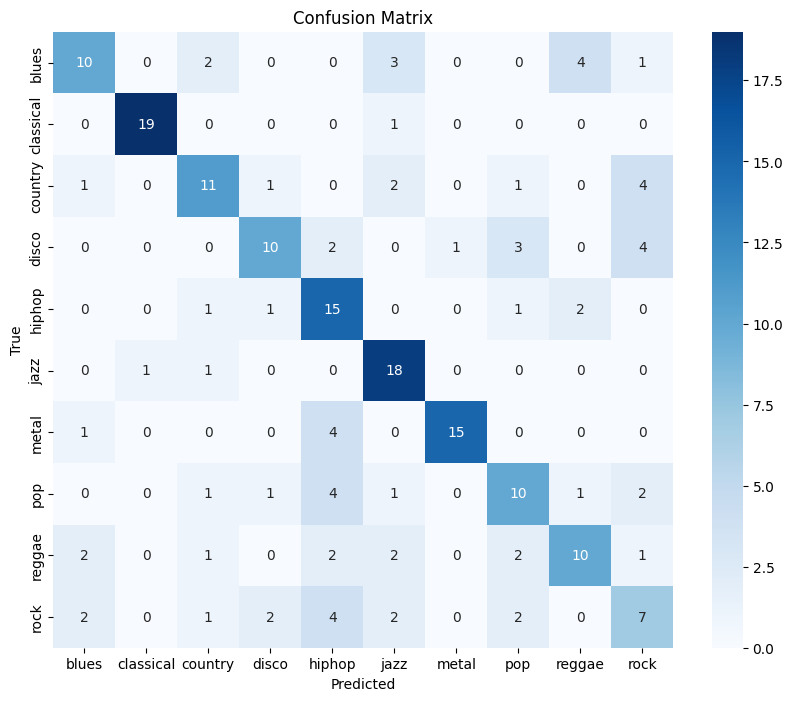

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(model, test_loader, label_encoder):
    model.eval()
    predictions = []
    true_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            predictions.extend(predicted.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    confusion = confusion_matrix(true_labels, predictions)
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(model, test_loader, label_encoder)

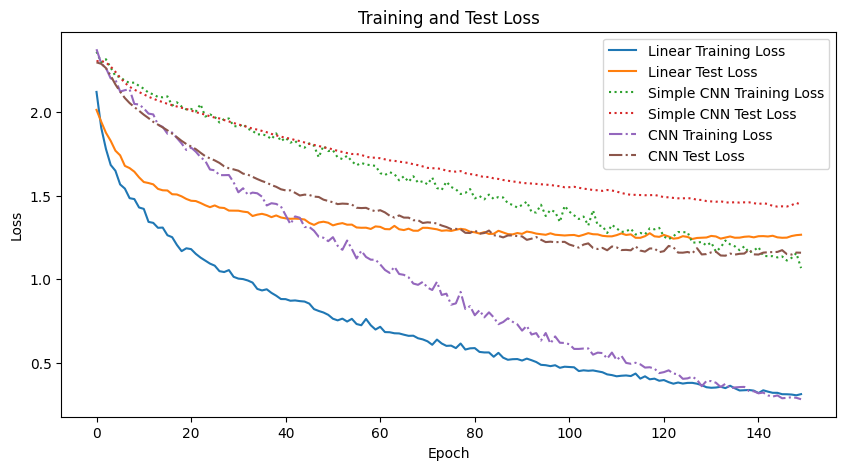

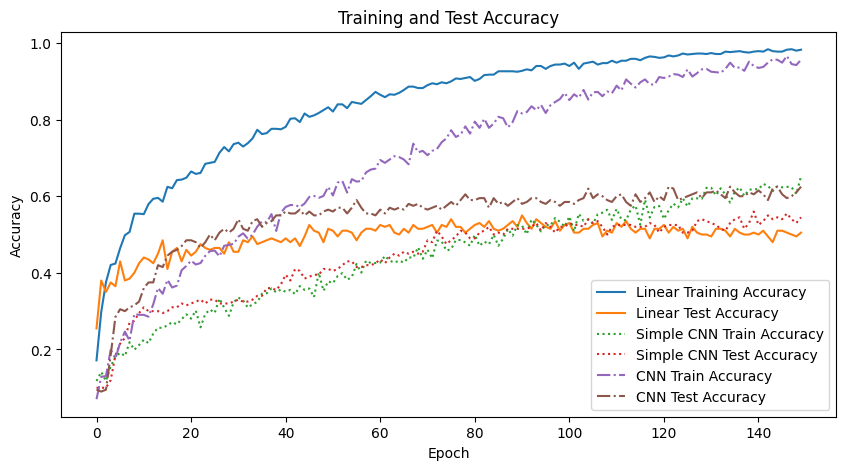

In [ ]:
# Plotting the training and test loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Linear Training Loss')
plt.plot(test_losses, label='Linear Test Loss')
plt.plot(simple_cnn_train_losses, label='Simple CNN Training Loss', linestyle=':')
plt.plot(simple_cnn_test_losses, label='Simple CNN Test Loss', linestyle=':')
plt.plot(cnn_train_losses, label='CNN Training Loss', linestyle='-.')
plt.plot(cnn_test_losses, label='CNN Test Loss', linestyle='-.')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

# Plotting the training and test accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Linear Training Accuracy')
plt.plot(test_accuracies, label='Linear Test Accuracy')
plt.plot(simple_cnn_train_accuracies, label='Simple CNN Train Accuracy', linestyle=':')
plt.plot(simple_cnn_test_accuracies, label='Simple CNN Test Accuracy', linestyle=':')
plt.plot(cnn_train_accuracies, label='CNN Train Accuracy', linestyle='-.')
plt.plot(cnn_test_accuracies, label='CNN Test Accuracy', linestyle='-.')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()

Train Accuracy: 99.87%
Test Accuracy: 57.00%


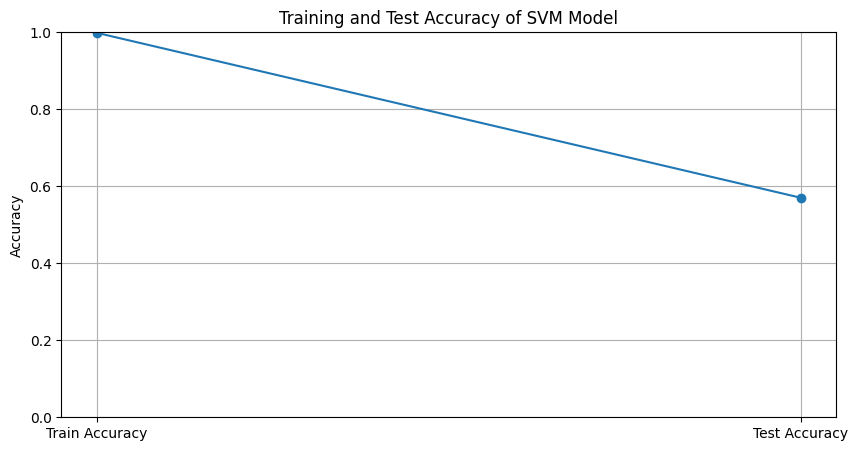

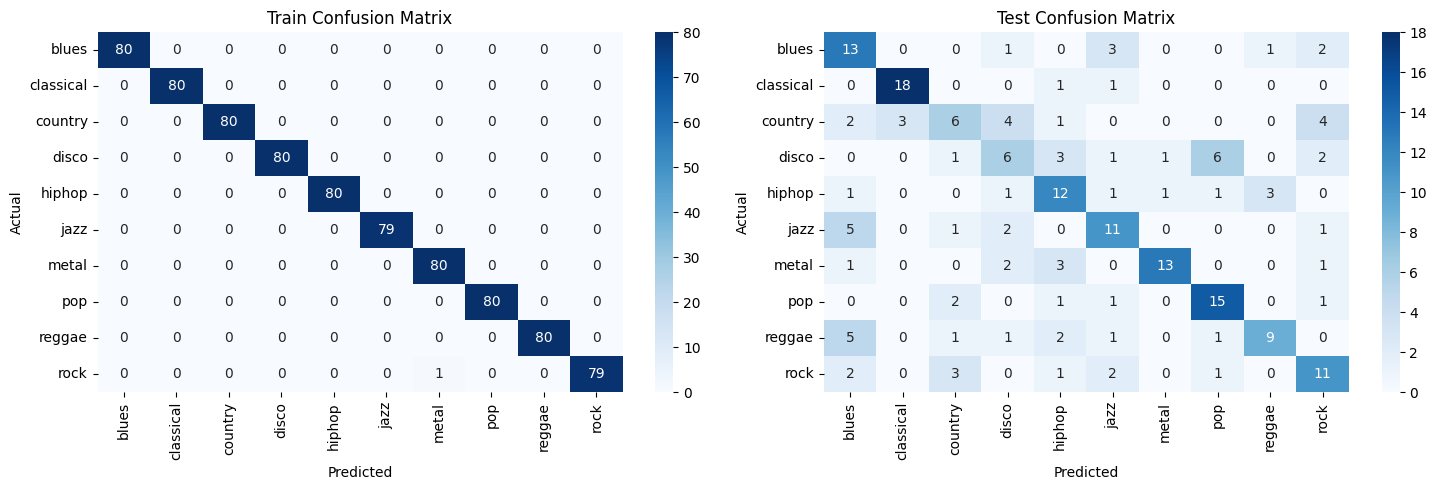

In [ ]:
import torch
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from torchvision import transforms
from torch.utils.data import DataLoader

# Load and preprocess data
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

myTransform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((64,100),antialias=True),
    transforms.Normalize(-42.88,15.50),
])

class MyDataset():
    def __init__(self, X, y, transform=None):
        self.X = X
        self.y = y
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        x = self.X[index]
        if self.transform:
            x = self.transform(x).float()

        y = torch.tensor(self.y[index])

        return x, y

train_data = MyDataset(X_train, y_train_encoded, myTransform)
test_data = MyDataset(X_test, y_test_encoded, myTransform)

train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
test_loader = DataLoader(test_data, batch_size=128)

# Reshape the data
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Train the SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_flattened, y_train)

# Evaluate the SVM
train_accuracy = accuracy_score(y_train, svm_model.predict(X_train_flattened))
test_accuracy = accuracy_score(y_test, svm_model.predict(X_test_flattened))

# Predictions
y_train_pred = svm_model.predict(X_train_flattened)
y_test_pred = svm_model.predict(X_test_flattened)

# Compute confusion matrix
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Print accuracies
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot accuracies
plt.figure(figsize=(10, 5))
plt.plot([0, 1], [train_accuracy, test_accuracy], marker='o', linestyle='-')
plt.xticks([0, 1], ['Train Accuracy', 'Test Accuracy'])
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy of SVM Model')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# Plot confusion matrix
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Train Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [ ]:
print("\nNames of all test files:")
for i in range(len(X_test)):
    print("Test file {}: {}".format(i, y_test[i]))


Names of all test files:
Test file 0: reggae
Test file 1: jazz
Test file 2: classical
Test file 3: reggae
Test file 4: blues
Test file 5: classical
Test file 6: metal
Test file 7: metal
Test file 8: reggae
Test file 9: country
Test file 10: metal
Test file 11: jazz
Test file 12: rock
Test file 13: rock
Test file 14: classical
Test file 15: reggae
Test file 16: hiphop
Test file 17: jazz
Test file 18: classical
Test file 19: jazz
Test file 20: country
Test file 21: blues
Test file 22: metal
Test file 23: hiphop
Test file 24: classical
Test file 25: reggae
Test file 26: disco
Test file 27: disco
Test file 28: hiphop
Test file 29: classical
Test file 30: hiphop
Test file 31: disco
Test file 32: hiphop
Test file 33: rock
Test file 34: pop
Test file 35: rock
Test file 36: metal
Test file 37: disco
Test file 38: classical
Test file 39: reggae
Test file 40: pop
Test file 41: rock
Test file 42: reggae
Test file 43: hiphop
Test file 44: rock
Test file 45: blues
Test file 46: classical
Test file